# MaterialsCoord benchmarking – tuning the `VoronoiNN` tolerance parameter

The performance of VoronoiNN can be tuned through the `tol` parameter. After the Voronoi decomposition, faces that are smaller than `tol` fraction of the largest face are not included in the tessellation. By default, in MaterialsCoord we have used a `tol` value of 0.5, however, this might not be the optimum. In those notebook, we trial a number of tolerance parameters and compare the results.

*Written using:*
- MaterialsCoord==0.1.0

*Authors: Alex Ganose (10/12/19)*

---

First, lets initialize a series of `VoronoiNN` classes with difference tolerance parameters.

In [1]:
import numpy as np

from pymatgen.analysis.local_env import VoronoiNN

tolerances = np.linspace(0, 1, 21)
nn_methods = [VoronoiNN(tol=t) for t in tolerances]

Next, import the benchmark and choose which structures we are interested in.

In [2]:
from materialscoord.core import Benchmark

structure_groups = ["common_binaries", "elemental", "A2BX4", "ABX3", "ABX4"]

bm = Benchmark.from_structure_group(structure_groups)

Calculate the scores.

In [3]:
scores = bm.score(nn_methods)

Plot the tolerance value against benchmark score.

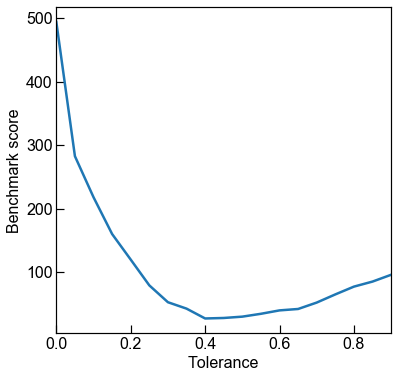

In [5]:
import matplotlib.pyplot as plt
from matplotlib import ticker
from pathlib import Path
import seaborn as sns

totals = scores.loc["Total"]

# define matplotlib style settings
style = {
    "font.sans-serif": ["Helvetica", "Arial"], "axes.labelsize": 16,
    "xtick.labelsize": 16, "ytick.labelsize": 16, "xtick.direction": "in",
    "ytick.direction": "in", "xtick.major.size": 8, "xtick.minor.size": 4,
    "ytick.major.size": 8, "ytick.minor.size": 4, "lines.linewidth": 2.5,
    "lines.markersize": 10, "axes.linewidth": 1.2, "xtick.major.width": 1.2,
    "xtick.minor.width": 1.2, "ytick.major.width": 1.2, "ytick.minor.width": 1.2,  
}

plt.style.use(style)
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(tolerances, totals)
ax.set(ylabel="Benchmark score", xlabel="Tolerance", xlim=(0, 0.9))

plt.savefig(Path("plots", "VoronoiNN-tolerance-tuning.pdf"), bbox_inches="tight")
plt.show()